## Import modules needed for this Jupyter notebook:

In [417]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import datetime, nltk, warnings
import itertools
from collections import Counter 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [105]:
def shorten_ids(column: pd.DataFrame):
    column = column.astype('string')
    new_column = column.str.split("-", 1)
    new_column = [i.pop(0) for i in new_column]
    return new_column

## Load the Chanel study data by reading in the CSV file:

In [102]:
df = pd.read_csv('chanel-cleaned-brands-only.csv')

print('Dataframe dimensions:', df.shape)
df['id'] = shorten_ids(df['id'])
df = df.drop(columns='email')

pd.set_option('display.max_colwidth', 300)
pd.set_option('display.colheader_justify', 'center')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 400 

df.head()

Dataframe dimensions: (90, 12)


,id,name,age,city,ethnicity,group,Brand #1,Brand #2,Factor #1,Factor #2,Factor #3
0,1431a109,Jiangrong Jin,33,San Marino,Asian,Under 40,Valentino,Dior,Quality,Lasts a Lifetime,Classic
1,d3fce5aa,Liz Giglio,33,Boston,White,Under 40,Balmain,Fendi,Timeless,Quality,Craftsmanship
2,7b2eaa22,Barbra Berwald,48,new york,White,40-60,Bailmain,Sain Laurent,Quality,Expensive,Creativity
3,0b52b90c,Yelena Ostrovskaya,34,Los Angeles,None,Under 40,Burberry,Gucci,Expensive,Quality,Creativity
4,b3dfb81b,Andie Schneider,30,New York,White,Under 40,Assoulin,Balmain,Timeless,Classic,Edgy


In [103]:
# Change data type of brand names from 'objects' to 'categories'
df.astype({'Brand #1': 'category',
           'Brand #2': 'category'}).dtypes 

id             object
name           object
age             int64
city           object
ethnicity      object
group          object
Brand #1     category
Brand #2     category
Factor #1      object
Factor #2      object
Factor #3      object
dtype: object

In [111]:
brand_list1 = Counter(df['Brand #1'])
brand_list2 = Counter(df['Brand #2'])
brand_list1.update(brand_list2)

In [113]:
brand_list1.most_common(10)

[('Chanel', 23),
 ('Gucci', 19),
 ('Burberry', 15),
 ('Hermes', 11),
 ('D&G', 9),
 ('Fendi', 9),
 ('Valentino', 8),
 ('Prada', 8),
 ('YSL', 7),
 ('Dior', 7)]

In [116]:
# Change data type of features from 'objects' to 'categories'
df.astype({'city': 'category',
           'ethnicity': 'category',
           'group': 'category',
           'Brand #1': 'category',
           'Brand #2': 'category',
           'Factor #1': 'category',
           'Factor #2': 'category',
           'Factor #3': 'category'}).dtypes 

id             object
name           object
age             int64
city         category
ethnicity    category
group        category
Brand #1     category
Brand #2     category
Factor #1    category
Factor #2    category
Factor #3    category
dtype: object

In [129]:
f1 = Counter(df['Factor #1'])

In [130]:
f2 = Counter(df['Factor #2'])

In [131]:
f3 = Counter(df['Factor #3'])

In [136]:
f1.most_common(10)

[('Quality', 76),
 ('Timeless', 53),
 ('Expensive', 28),
 ('Unique', 19),
 ('Lasts a Lifetime', 19),
 ('Service', 15),
 ('Retains Value', 12),
 ('Feels Good', 12),
 ('History', 9),
 ('Craftsmanship', 7)]

In [384]:
train = pd.read_csv('chanel-binary-class-chanel-train.csv')

In [385]:
train.head()

,Chanel owner,age,city,ethnicity,group,factor #1
0,1,53,Miami,White,40-60,Classic
1,0,24,Los Angeles,White,Under 40,Expensive
2,0,27,Miami,African American,Under 40,Expensive
3,1,32,New York,White,Under 40,Expensive
4,1,59,New York,White,40-60,Expensive


<AxesSubplot:>

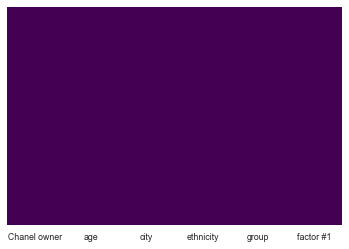

In [386]:
sns.set_style('whitegrid')
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Chanel owner', ylabel='count'>

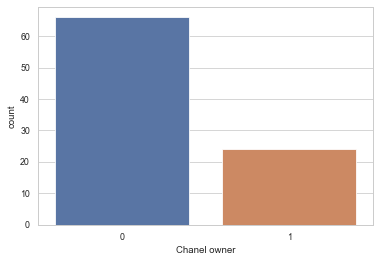

In [387]:
sns.countplot(x='Chanel owner', data=train)

<AxesSubplot:xlabel='Chanel owner', ylabel='count'>

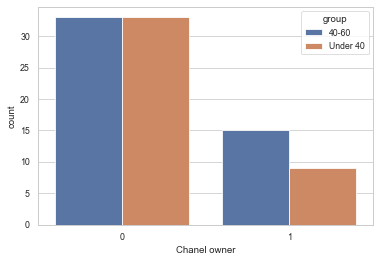

In [388]:
sns.set_context('paper')
sns.countplot(x='Chanel owner', hue='group', data=train)

<AxesSubplot:xlabel='Chanel owner', ylabel='count'>

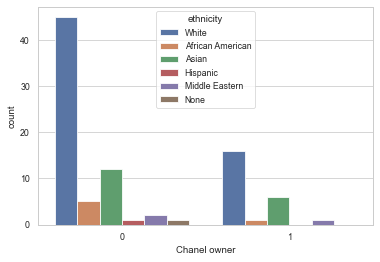

In [389]:
# looks like people who own Chanel tend to be 40 - 60 years old
sns.set_context('paper')
sns.countplot(x='Chanel owner', hue='ethnicity', data=train)

<AxesSubplot:xlabel='Chanel owner', ylabel='count'>

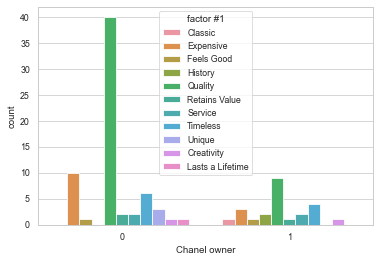

In [390]:
sns.set_context('paper')
sns.countplot(x='Chanel owner', hue='factor #1', data=train)

<AxesSubplot:ylabel='Frequency'>

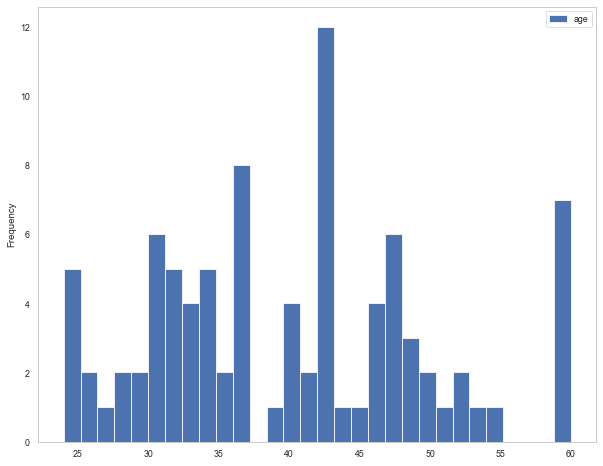

In [391]:
train['age'].plot.hist(figsize=(10, 8), legend=True, grid=False, bins=30)

In [392]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Chanel owner  90 non-null     int64 
 1   age           90 non-null     int64 
 2   city          90 non-null     object
 3   ethnicity     90 non-null     object
 4   group         90 non-null     object
 5   factor #1     90 non-null     object
dtypes: int64(2), object(4)
memory usage: 4.3+ KB


In [297]:
import cufflinks as cf 

In [237]:
cf.go_offline()

In [240]:
# train['age'].iplot(kind='hist', bins=30)

<AxesSubplot:xlabel='Chanel owner', ylabel='age'>

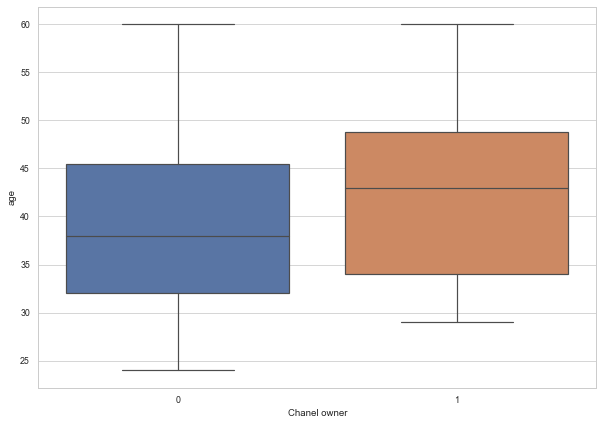

In [393]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Chanel owner', y='age', data=train)

In [377]:
train = pd.read_csv('chanel-binary-class-chanel-train.csv')

In [394]:
train.head()

,Chanel owner,age,city,ethnicity,group,factor #1
0,1,53,Miami,White,40-60,Classic
1,0,24,Los Angeles,White,Under 40,Expensive
2,0,27,Miami,African American,Under 40,Expensive
3,1,32,New York,White,Under 40,Expensive
4,1,59,New York,White,40-60,Expensive


In [395]:
city = pd.get_dummies(train['city'])
ethnicity = pd.get_dummies(train['ethnicity'])
group = pd.get_dummies(train['group'], drop_first=True)
factor1 = pd.get_dummies(train['factor #1'])

In [396]:
train.drop(['city', 'ethnicity', 'group', 'factor #1'], axis=1, inplace=True)

In [397]:
train.head()

,Chanel owner,age
0,1,53
1,0,24
2,0,27
3,1,32
4,1,59


In [398]:
train2 = pd.concat([train['Chanel owner'], train['age'], city, ethnicity, group, factor1], axis=1)

In [399]:
train2.head()

,Chanel owner,age,Atlanta,Boston,Chicago,Chicago,Cincinnati,Dallas,Dallas,Denver,Los Angeles,Miami,New York,Philadelphia,San Francisco,African American,Asian,Hispanic,Middle Eastern,None,White,Under 40,Classic,Creativity,Expensive,Feels Good,History,Lasts a Lifetime,Quality,Retains Value,Service,Timeless,Unique
0,1,53,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,0,24,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
2,0,27,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,1,32,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
4,1,59,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [400]:
X = train2.drop('Chanel owner', axis=1)
y = train2['Chanel owner']

In [415]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [416]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        20
           1       1.00      0.20      0.33        10

    accuracy                           0.73        30
   macro avg       0.86      0.60      0.58        30
weighted avg       0.81      0.73      0.67        30



In [454]:
df = pd.read_csv('chanel-full-nlp.csv')

In [ ]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.colheader_justify', 'center')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 400 

In [457]:
df.head(10)

,name,age,city,ethnicity,group,definition
0,Abby Tiesch,43,San Francisco,80,40-60,Well made. Unique pieces that you won’t see every day. High end fashion. Good customer service i...
1,Aigul Tyshkanbayeva,52,Houston,None,40-60,The designer pieces are more creative and timeless. The quality is superior. They can be an inve...
2,Akiko Kan,52,Foster City,20,40-60,Timeless and ageless styles are the main reason I shop for the luxury fashion brands. For exampl...
3,Alana Szilagyi,26,Dallas,80,Under 40,"The history and longevity of the brand make it trusted for quality and service, justifying the p..."
4,Alexandra Jeffus,30,Dallas,80,Under 40,Quality and timeless-ness.
5,Ali Edwards,27,New York,80,Under 40,"Price, quality, reputation"
6,Alison Rosenberg,56,Wellington,80,40-60,When I was a little girl I used to imagine myself walking down Fifth Avenue and looking into the...
7,Alissa Beir,50,Miami,80,40-60,Luxury brands are timeless and classic and can have an edge all at the same time. It makes you p...
8,Alla Plotkin,57,New York,80,40-60,"The luxury designer clothing,shoes,bags quality is for lifetime and always look classy and in style"
9,Amanda Swain,37,Norman,80,Under 40,Luxury items are well-made fashion pieces that retain their value.
